#**Multinomial Naive Bayes classifier for QuBAN Dataset of Questions**

#Dataset Initialization

In [ ]:
# @title Module Import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import sklearn
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.ndimage import gaussian_filter

nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# @title Importing Dataset from Drive

file_path = 'drive/My Drive/Categorized Questions Dataset QuBAN.xlsx'

cis101_df = pd.read_excel(file_path, sheet_name="CIS101 Questions")
csc203_df = pd.read_excel(file_path, sheet_name="CSC203 Questions")
off_topic_df = pd.read_excel(file_path, sheet_name="Off-Topic Questions")
off_topic_df['Topic'] = 'Off-Topic'
off_topic_df = off_topic_df[['Topic', 'Question']].rename(columns={'Question': 'Questions'})

In [ ]:
cis101_head = cis101_df.head()
csc203_head = csc203_df.head()
off_topic_head = off_topic_df.head()

In [ ]:
cis101_head

,Topic,Score,Questions
0,Computing Mechanism,5,What is the difference between symmetric multi...
1,Computing Mechanism,5,"What are Python descriptors, and how do they w..."
2,Computing Mechanism,20,What is the principle behind optical computing...
3,Computing Mechanism,20,What is the name of the technique that uses mu...
4,Computing Mechanism,20,What are the challenges and limitations of imp...


In [ ]:
csc203_head

,Topic,Score,Questions
0,Binary Search Tree,5,What is the difference between recursion & bst?
1,Binary Search Tree,5,What are the differences between a binary sear...
2,Binary Search Tree,5,"How does the concept of ""tree rotation"" work, ..."
3,Binary Search Tree,5,What is a binary search tree (BST) and how doe...
4,Binary Search Tree,5,What is the significance of the binary search ...


In [ ]:
off_topic_head

,Topic,Questions
0,Off-Topic,Before inserting into stack one must check the...
1,Off-Topic,Your thoughts on chatgpt.?
2,Off-Topic,Is socialism valid for everyone.?
3,Off-Topic,Is it bad to be stoned in classn.?
4,Off-Topic,DO YOU FEEL LIKE YOUVE LIVED THIS SAME DAY MAN...


In [ ]:
# @title Cleaning & Combining Datasets

def clean_text(text):
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    return text

cis101_df['Questions'] = cis101_df['Questions'].apply(clean_text)
csc203_df['Questions'] = csc203_df['Questions'].apply(clean_text)
off_topic_df['Questions'] = off_topic_df['Questions'].apply(clean_text)

combined_df = pd.concat([
    cis101_df[['Topic', 'Questions']],
    csc203_df[['Topic', 'Questions']],
    off_topic_df[['Topic', 'Questions']]
], ignore_index=True)

off_topic_df

,Topic,Questions
0,Off-Topic,before inserting into stack one must check the...
1,Off-Topic,your thoughts on chatgpt
2,Off-Topic,is socialism valid for everyone
3,Off-Topic,is it bad to be stoned in classn
4,Off-Topic,do you feel like youve lived this same day man...
...,...,...
5949,Off-Topic,how can you prepare or interpret financial doc...
5950,Off-Topic,what do you interpret or understand about chan...
5951,Off-Topic,how you can examine or use journals to evaluat...
5952,Off-Topic,how can you identify the management goals of m...


#Select Course

In [ ]:
# @title Course Selection

course = "CSC203" # @param ["CIS101", "CSC203"] {type:"string"}

if course=="CIS101":
  X = cis101_df['Questions']
  y = cis101_df['Topic'].tolist()
elif course=="CSC203":
  X = csc203_df['Questions']
  y = csc203_df['Topic'].tolist()

#Training

In [ ]:
X

0           what is the difference between recursion  bst
1       what are the differences between a binary sear...
2       how does the concept of tree rotation work and...
3       what is a binary search tree bst and how does ...
4       what is the significance of the binary search ...
                              ...                        
1445    can you explain the idea of a stackless execut...
1446    how can a stack be used in solving problems th...
1447    can you provide an example of using a stack to...
1448    what is a stack frame and why is it important ...
1449    how can a stack be used in applications involv...
Name: Questions, Length: 1450, dtype: object

In [ ]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [token.lower() for token in tokens if token.isalpha() and token.lower() not in stop_words]
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    return " ".join(stemmed_tokens)

X_preprocessed = [preprocess_text(text) for text in X]
X_preprocessed[0:5]

['differ recurs bst',
 'differ binari search tree btree scenario one prefer',
 'concept tree rotat work applic binari search tree',
 'binari search tree bst differ type binari tree',
 'signific binari search properti binari search tree']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

In [ ]:
X_train[0:5]

['implement stack use queue',
 'implement stack constanttim push pop getmin oper',
 'queuebas algorithm employ optim graph travers problem find shortest path weight graph use dijkstra algorithm',
 'differ weight unweight graph',
 'role intuit play solv recurs problem develop intuit time']

In [ ]:
y_train[0:5]

['Stacks', 'Stacks', 'Queues', 'Graph', 'Recursion']

In [ ]:
vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)

In [ ]:
classifier = MultinomialNB()
classifier.fit(X_train_transformed, y_train)

MultinomialNB()

In [ ]:
X_test_transformed = vectorizer.transform(X_test)

y_pred = classifier.predict(X_test_transformed)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8


#Prediction

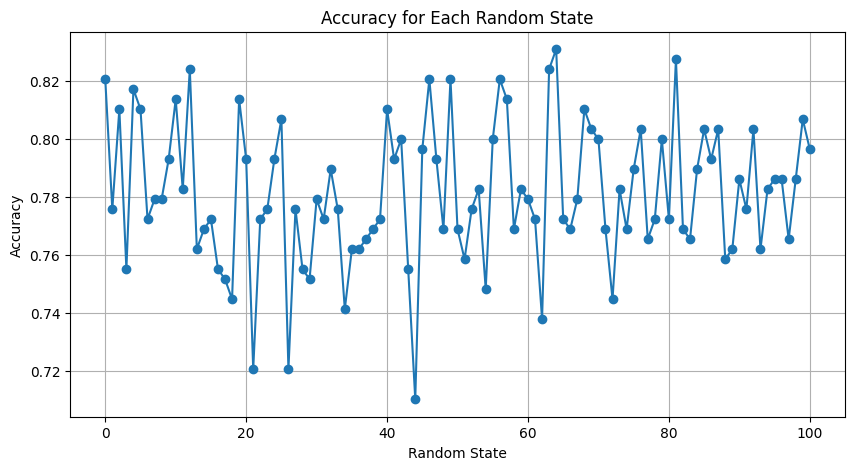

In [ ]:
# @title Accuracy For Each Random State

accuracies = []
random_states = range(0, 101)

for state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=state)

    vectorizer = TfidfVectorizer()
    X_train_transformed = vectorizer.fit_transform(X_train)

    classifier = MultinomialNB()
    classifier.fit(X_train_transformed, y_train)

    X_test_transformed = vectorizer.transform(X_test)
    y_pred = classifier.predict(X_test_transformed)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 5))
plt.plot(random_states, accuracies, marker='o')
plt.title('Accuracy for Each Random State')
plt.xlabel('Random State')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

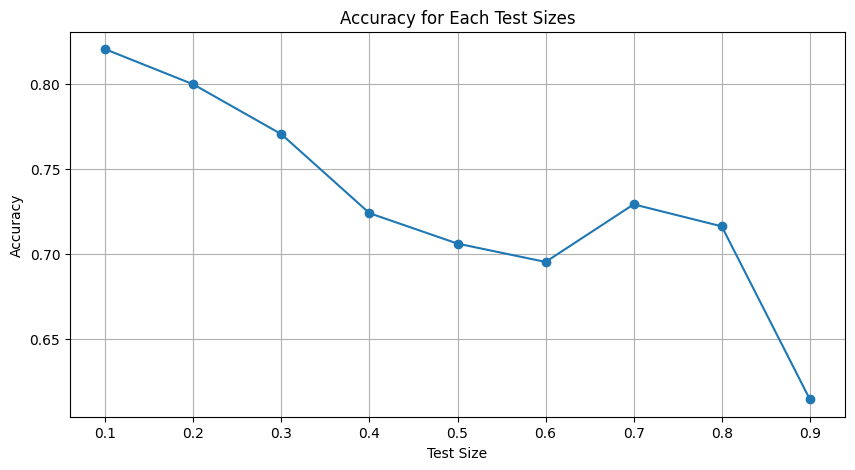

In [ ]:
accuracies = []
test_sizes = np.linspace(0.1, 0.9, 9)

for size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=size, random_state=42)

    vectorizer = TfidfVectorizer()
    X_train_transformed = vectorizer.fit_transform(X_train)

    classifier = MultinomialNB()
    classifier.fit(X_train_transformed, y_train)

    X_test_transformed = vectorizer.transform(X_test)
    y_pred = classifier.predict(X_test_transformed)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 5))
plt.plot(test_sizes, accuracies, marker='o')
plt.title('Accuracy for Each Test Sizes')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

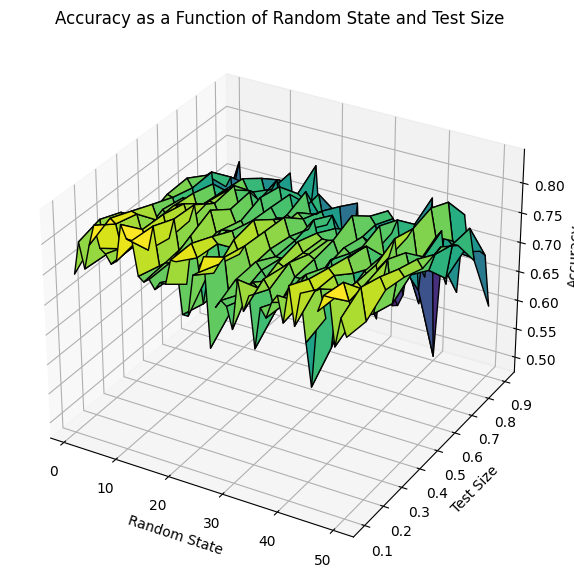

In [ ]:
random_states = range(1, 51)
test_sizes = np.linspace(0.1, 0.9, 9)

accuracies = np.zeros((len(random_states), len(test_sizes)))

for i, state in enumerate(random_states):
    for j, test_size in enumerate(test_sizes):
        X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=test_size, random_state=state)

        vectorizer = TfidfVectorizer()
        X_train_transformed = vectorizer.fit_transform(X_train)

        classifier = MultinomialNB()
        classifier.fit(X_train_transformed, y_train)

        X_test_transformed = vectorizer.transform(X_test)
        y_pred = classifier.predict(X_test_transformed)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies[i, j] = accuracy

X, Y = np.meshgrid(random_states, test_sizes)
Z = accuracies.T

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k')
ax.set_xlabel('Random State')
ax.set_ylabel('Test Size')
ax.set_zlabel('Accuracy')
ax.set_title('Accuracy as a Function of Random State and Test Size')
plt.show()

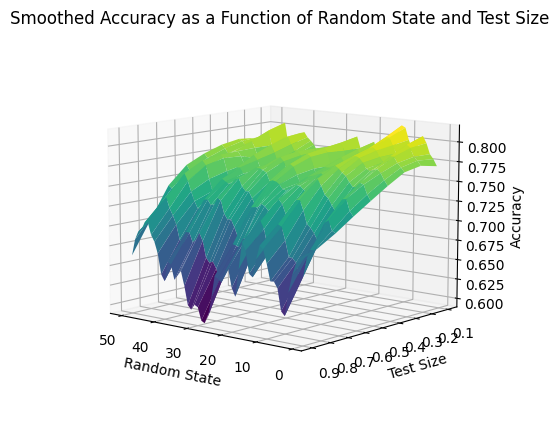

In [ ]:
smoothed_accuracies = gaussian_filter(accuracies, sigma=1)
X, Y = np.meshgrid(random_states, test_sizes)
Z = smoothed_accuracies.T

fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=10, azim=130)
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('Random State')
ax.set_ylabel('Test Size')
ax.set_zlabel('Accuracy')
ax.set_title('Smoothed Accuracy as a Function of Random State and Test Size')
plt.show()

In [ ]:
# Find the index of the maximum accuracy value
max_index = np.unravel_index(np.argmax(accuracies, axis=None), accuracies.shape)

# Retrieve the corresponding random_state and test_size values
max_random_state = random_states[max_index[0]]
max_test_size = test_sizes[max_index[1]]
max_accuracy = accuracies[max_index]

print("Global peak accuracy:", max_accuracy)
print("Random State at global peak:", max_random_state)
print("Test Size at global peak:", max_test_size)

Global peak accuracy: 0.8482758620689655
Random State at global peak: 10
Test Size at global peak: 0.1


In [ ]:
# Flatten the accuracies array and get the indices of the top 10 accuracy values
top_10_indices = np.unravel_index(np.argsort(accuracies.ravel())[-10:], accuracies.shape)

# Retrieve the corresponding random_state, test_size, and accuracy values
top_10_random_states = [random_states[i] for i in top_10_indices[0]]
top_10_test_sizes = [test_sizes[i] for i in top_10_indices[1]]
top_10_accuracies = [accuracies[i, j] for i, j in zip(top_10_indices[0], top_10_indices[1])]

print("Top 10 Global Peaks:")
for i in range(10):
    print(f"{i+1}. Random State: {top_10_random_states[i]}, Test Size: {top_10_test_sizes[i]}, Accuracy: {top_10_accuracies[i]}")

Top 10 Global Peaks:
1. Random State: 46, Test Size: 0.2, Accuracy: 0.8206896551724138
2. Random State: 12, Test Size: 0.2, Accuracy: 0.8241379310344827
3. Random State: 47, Test Size: 0.1, Accuracy: 0.8275862068965517
4. Random State: 12, Test Size: 0.1, Accuracy: 0.8275862068965517
5. Random State: 11, Test Size: 0.1, Accuracy: 0.8275862068965517
6. Random State: 46, Test Size: 0.1, Accuracy: 0.8275862068965517
7. Random State: 40, Test Size: 0.1, Accuracy: 0.8275862068965517
8. Random State: 5, Test Size: 0.1, Accuracy: 0.8344827586206897
9. Random State: 25, Test Size: 0.1, Accuracy: 0.8344827586206897
10. Random State: 10, Test Size: 0.1, Accuracy: 0.8482758620689655
